In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Drosophila melanogaster (D. mel) and Panorpa cognata

This notebook needs:
- Location of d.mel genes in its genome (Dmel_longestCDS_chromosome.joinable)
- Panorpa transcripts assignment (X/A) (trans_location25.txt or trans_location_all.txt)
- 1 to 1 orthologus genes of d.mel-Panorpa (Panorpa_Dmel_1to1.txt)

It will output:
- Plot with percentage of X-linked genes in Panorpa for each d.mel Muller element (png file)



# Drosophila melanogaster genes and location

In [2]:
## data1: creates dataframe from transcript_names_final file containing d.mel genes names and their scaffold location
data1 = pd.read_table('Dmel_longestCDS_chromosome.joinable', delimiter=' ', header=None)
## cds_loc: Selects only columns 0 and 1 from data1
cds_loc = data1[[0,1]]
## gives names to columns in cds_loc
cds_loc.columns = ['trueGenes','trueLocation_']
## 'trueLocation' is a new column with muller elements assigned in cds_loc
cds_loc['trueLocation'] = ['F' if x == '4' else 'E' if x == '3R' 
                     else 'D' if x == '3L' else 'C' if x == '2R' 
                     else 'B' if x == '2L' else 'A' if x == 'X' 
                     else 'nA' for x in cds_loc['trueLocation_']]

# Analysis with 25 largest scaffolds or all scaffolds in Panorpa genome
Select file with Panorpa transcripts assignment (X/A) 
- trans_location25.txt 
- trans_location_all.txt

In [3]:
## trans_loc: creates dataframe from panorpa transcripts location file
trans_loc = pd.read_table('trans_location25.txt',delimiter=',')

# Homology D. mel-P. cognata

In [4]:
## dataOrtho: creates dataframe with orthologous genes panorpa/d.mel file from orthofinder Panorpa_Dmel_1to1.txt'
dataOrtho = pd.read_table('Panorpa_Dmel_1to1.txt', header= None, delimiter=' ')
## ortho: dataframes with only column 0 and 1 from dataOrtho
ortho = dataOrtho[[0,1]]
## gives names to columns in ortho
ortho.columns = ['Transcript','trueGenes']
## merges ortho and trans_loc dataframes according to 'Transcript' in panorpa in hom dataframe
hom = pd.merge(trans_loc, ortho, on=['Transcript'])
## merges cds_loc and hom according to 'trueGenes' in finald dataframe
## to know location of homologous genes in d.mel's muller elements
finald = pd.merge(hom, cds_loc, on=['trueGenes'])

In [5]:
## counts of genes that are X-linked or autosomal in panorpa
## in each trueLocation "muller element'
## nA: genes not assigned to muller elements
vi = pd.crosstab(finald.trueLocation, finald.chromosome_pan,
            margins=True,margins_name='Total')
vi

chromosome_pan,A,X,Total
trueLocation,,,
A,520,39,559
B,526,29,555
C,567,79,646
D,616,60,676
E,650,132,782
F,15,24,39
nA,3,0,3
Total,2897,363,3260


In [6]:
## how many genes do we have in each Muller element that are X-linked and autosomal in panorpa?
## Ax: Genes x-linked in Muller element A
## Aa: autosomal genes in Muller element A
## ...
Ax = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="A")].index)
Aa = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="A")].index)
Bx = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="B")].index)
Ba = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="B")].index)
Cx = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="C")].index)
Ca = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="C")].index)
Dx = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="D")].index)
Da = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="D")].index)
Ex = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="E")].index)
Ea = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="E")].index)
Fx = len(finald['chromosome_pan'][(finald['chromosome_pan']=="X") & (finald['trueLocation']=="F")].index)
Fa = len(finald['chromosome_pan'][(finald['chromosome_pan']=="A") & (finald['trueLocation']=="F")].index)
## element: list of muller elements
element = ['A','B','C','D','E','F']
## frequency: list of frequency for each element. Number of X-linked genes in the total number of genes in that element
frequency =[Ax/(Ax+Aa)*100,Bx/(Bx+Ba)*100,Cx/(Cx+Ca)*100,Dx/(Dx+Da)*100,Ex/(Ex+Ea)*100,Fx/(Fx+Fa)*100]
## totalX: total number of X-linked genes
totalX = Ax+Bx+Cx+Dx+Ex+Fx
## totalA: total number of autosomal genes
totalA = Aa+Ba+Ca+Da+Ea+Fa
## contingency tables for each Muller element
## categorical values: gene 'type' (X-linked or autosomal), location (genes are in that element or not)
contg1=[]
contg_A = [[Ax,(totalX-Ax)],[Aa,(totalA-Aa)]]
contg1.append(contg_A)
contg_B = [[Bx,(totalX-Bx)],[Ba,(totalA-Ba)]]
contg1.append(contg_B)
contg_C = [[Cx,(totalX-Cx)],[Ca,(totalA-Ca)]]
contg1.append(contg_C)
contg_D = [[Dx,(totalX-Dx)],[Da,(totalA-Da)]]
contg1.append(contg_D)
contg_E = [[Ex,(totalX-Ex)],[Ea,(totalA-Ea)]]
contg1.append(contg_E)
contg_F = [[Fx,(totalX-Fx)],[Fa,(totalA-Fa)]]
contg1.append(contg_F)
## chi-squared test for each element
pvalues = []
for i in range(6):
    tat, p, dof, expected = chi2_contingency(contg1[i])
    pvalues.append(p)
    i = i+1
## df: final dataframe with the frequency and p-values for each element
df = pd.DataFrame({'element': element, 'frequency': frequency, 'pvalues': pvalues}, columns=['element', 'frequency', 'pvalues'])
df

,element,frequency,pvalues
0,A,6.976744,7.594067e-04
1,B,5.225225,1.653728e-06
2,C,12.229102,3.639280e-01
3,D,8.875740,4.157954e-02
4,E,16.879795,7.444461e-09
5,F,61.538462,1.072391e-22


In [7]:
## (for plot) conditions to assign significance according to p-values
##  p-value >= 0.05 : NS
##  p-value <= 0.01 : ***
##  p-value <= 0.01 : **
##  p-value <= 0.05 : *
## adds a new column "significance" to dataframe df
df['significance'] = ['NS' if x >= 0.05 else '***' if x <= 0.001 
                     else '**' if x <= 0.01 else '*' if x <= 0.05 else 'ab' for x in df['pvalues']]
## converts significance labels into a list from the dataframe df
sig = df['significance'].tolist()

df

,element,frequency,pvalues,significance
0,A,6.976744,7.594067e-04,***
1,B,5.225225,1.653728e-06,***
2,C,12.229102,3.639280e-01,NS
3,D,8.875740,4.157954e-02,*
4,E,16.879795,7.444461e-09,***
5,F,61.538462,1.072391e-22,***


# Final bar plot

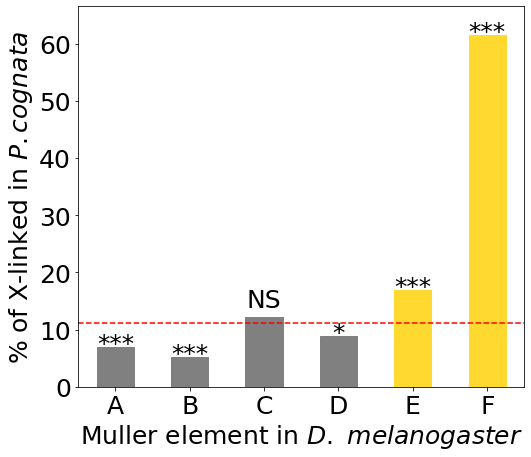

In [8]:
## fs: font size
fs = 25
## treshold to tell us which elements are overrepresented 
tr = (totalX/(totalA+totalX))*100
## final plot
plots=df.plot.bar('element','frequency',legend = False, rot = 0,figsize = (8,7), fontsize = fs)
## elements that are overrepresenetd are painted in 'yellow'
for bar in plots.patches:
    if bar.get_height() > 15:
        bar.set_color('#FFD92F')
    else:
        bar.set_color('grey')
## annotates significance labels for each element
plots.annotate( sig[0],xy=(0.005,frequency[0]+0.5), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
plots.annotate( sig[1],xy=(1,frequency[1]+0.5), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
plots.annotate(sig[2],xy=(2,frequency[2]+3), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
plots.annotate( sig[3],xy=(3,frequency[3]+0.5), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
plots.annotate( sig[4],xy=(4,frequency[4]+0.5), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
plots.annotate(sig[5],xy=(5,frequency[5]+0.5), horizontalalignment='center',
              verticalalignment='center',fontsize=fs)
## draws tr line
plt.axhline(y=tr, color='r', linestyle='dashed')
## y-axis limit
plt.ylim([0, frequency[5]+5])
## labels of x and y- axis
plt.xlabel("Muller element in $\it{D.}$ $\it{melanogaster}$", fontsize=fs)
plt.ylabel("% of X-linked in $\it{P. cognata}$", fontsize=fs)
## saves figure as png 
plt.savefig('dmel.png', bbox_inches='tight',dpi = 400)
## shows plot
plt.show()